<a href="https://colab.research.google.com/github/Utkarsh-kumar-singh/Deep-Learning/blob/main/CNN_Dog_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras==2.12.0

In [ ]:
/content/drive/MyDrive/Cat and Dog/archive (5)/test_set
/content/drive/MyDrive/Cat and Dog/archive (5)/test_set/test_set


/content/drive/MyDrive/Cat and Dog/archive (5)/training_set
/content/drive/MyDrive/Cat and Dog/archive (5)/training_set/training_set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/drive/MyDrive/Cat and Dog/archive (5)/training_set/training_set',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/drive/MyDrive/Cat and Dog/archive (5)/test_set/test_set',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"


)


Found 990 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [ ]:
for i in train_ds:
    print(i)

Streaming output truncated to the last 5000 lines.
        [[0.69041413, 0.6865177 , 0.6750829 ],
         [0.61389697, 0.61425817, 0.5965404 ],
         [0.66178024, 0.66178024, 0.65038323],
         ...,
         [0.7268628 , 0.785265  , 0.81899965],
         [0.7253989 , 0.78776866, 0.8150264 ],
         [0.72536767, 0.7878064 , 0.814951  ]],

        ...,

        [[0.74566877, 0.74566877, 0.74566877],
         [0.48718464, 0.48718464, 0.48718464],
         [0.38637313, 0.38637313, 0.38637313],
         ...,
         [0.67492545, 0.69679886, 0.68916255],
         [0.6653039 , 0.7014629 , 0.6893995 ],
         [0.66726685, 0.7015319 , 0.6893995 ]],

        [[0.659886  , 0.659886  , 0.659886  ],
         [0.53703886, 0.53703886, 0.53703886],
         [0.44573066, 0.44573066, 0.44573066],
         ...,
         [0.70038056, 0.6914186 , 0.69341826],
         [0.6902803 , 0.6977252 , 0.6952206 ],
         [0.69007355, 0.69779414, 0.6952206 ]],

        [[0.39540634, 0.39540634, 0.39540

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# if i want to fast process

In [ ]:
model=Sequential()

In [ ]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_ds,epochs=2,validation_data=validation_ds, batch_size = 128)

Epoch 1/2
12/31 [==========>...................] - ETA: 1s - loss: 0.0584 - accuracy: 0.9297

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dog_image=plt.imread(r"/content/download.jpg")

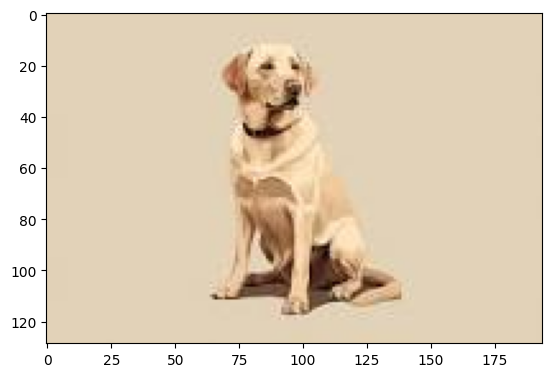

In [ ]:
plt.imshow(dog_image)

In [ ]:
cat_image=plt.imread(r"/content/download (1).jpg")

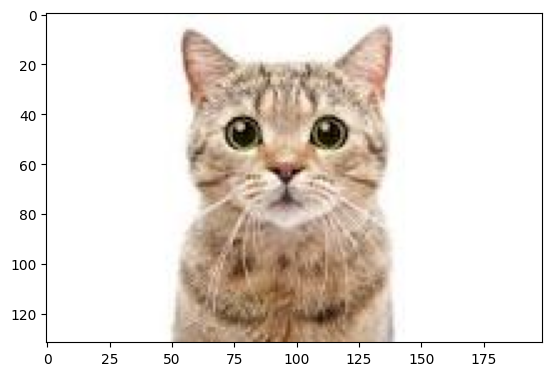

In [ ]:
plt.imshow(cat_image)

In [ ]:
dog_image.shape

(129, 194, 3)

In [ ]:
cat_image.shape

(132, 199, 3)

In [ ]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [ ]:
dog_resize.shape

(256, 256, 3)

In [ ]:
cat_resize.shape

(256, 256, 3)

In [ ]:
dog_resize=dog_resize.reshape((1,256,256,3))

In [ ]:
dog_resize.shape

(1, 256, 256, 3)

In [ ]:
cat_resize=cat_resize.reshape((1,256,256,3))

In [ ]:
pred=model.predict(dog_resize)

1/1 [==============================] - 0s 261ms/step


In [ ]:
pred

array([[1.]], dtype=float32)

In [ ]:
pred1 = model.predict(cat_resize)

1/1 [==============================] - 0s 19ms/step


In [ ]:
pred1

array([[1.]], dtype=float32)

In [ ]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of dog


In [ ]:
if pred1==0:
    print("this is a image of dog")
else:
    print("this is a image of cat")

this is a image of cat


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Augumentation

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
myimg = image.load_img("/content/download.jpg", target_size = (256,256))

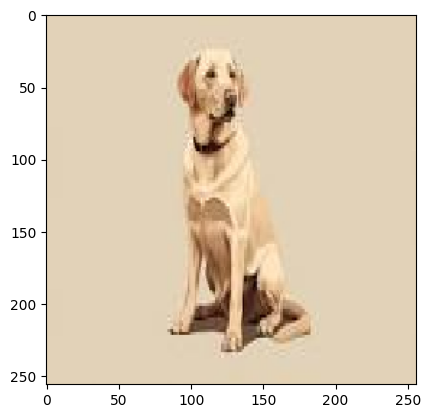

In [ ]:
plt.imshow(myimg)

In [ ]:
img = image.img_to_array(myimg)

In [ ]:
img

array([[[226., 210., 184.],
        [226., 210., 184.],
        [226., 210., 184.],
        ...,
        [226., 210., 184.],
        [226., 210., 184.],
        [226., 210., 184.]],

       [[226., 210., 184.],
        [226., 210., 184.],
        [226., 210., 184.],
        ...,
        [226., 210., 184.],
        [226., 210., 184.],
        [226., 210., 184.]],

       [[226., 210., 184.],
        [226., 210., 184.],
        [226., 210., 184.],
        ...,
        [226., 210., 184.],
        [226., 210., 184.],
        [226., 210., 184.]],

       ...,

       [[226., 210., 184.],
        [226., 210., 184.],
        [226., 210., 184.],
        ...,
        [225., 209., 183.],
        [225., 209., 183.],
        [225., 209., 183.]],

       [[226., 210., 184.],
        [226., 210., 184.],
        [226., 210., 184.],
        ...,
        [226., 210., 184.],
        [226., 210., 184.],
        [226., 210., 184.]],

       [[226., 210., 184.],
        [226., 210., 184.],
        [226., 2

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.2,
     horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

In [ ]:
img.shape

(256, 256, 3)

In [ ]:
input_img = img.reshape(1,256, 256, 3)

In [ ]:
datagen.flow(input_img, save_to_dir = "/content/Augumented img")

In [ ]:
i = 0
for output in datagen.flow(input_img, save_to_dir = "/content/Augumented img"):
  i = i+1

  if i == 100:
    break

In [ ]:
train_data_gen = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale = 1./255
)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    "/content/drive/MyDrive/Cat and Dog/archive (5)/training_set/training_set",
    target_size = (150,150),
    batch_size = 50,
    class_mode = "binary"
)

Found 990 images belonging to 2 classes.


In [ ]:
test_data_gen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
test_generator = train_data_gen.flow_from_directory(
    "/content/drive/MyDrive/Cat and Dog/archive (5)/test_set/test_set",
    target_size = (150,150),
    batch_size = 50,
    class_mode = "binary"
)

Found 2023 images belonging to 2 classes.


In [ ]:
model.summary()

NameError: ignored

In [ ]:
model=Sequential()

In [ ]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(train_generator,epochs=1,validation_data=test_generator)

<ipython-input-33-2bae73bd2c0b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,epochs=1,validation_data=test_generator)


20/20 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 1.0000

KeyboardInterrupt: ignored